# Analýza zákazníků

Máme k dispozici seznam zákazníků s jejich osobními informacemi a jejich chováním.

Na trh chceme uvést nový luxusní a drahý výrobek. 

Na které zákazníky máme zaměřit personalizovaný marketing?

# Úkol
- Proveďte základní analýzu dat a jejich vizualizaci
- Proveďte úpravu dat (encoding)
- Vyberte vhodné proměnné, podle kterých půjdou zákazníci segmentovat
- Vytvořte k-mean model s vhodným počtem segmentů
- Vizualizujte model
- Který segment je cílový?

# Načtení dat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
data=pd.read_csv('..\\dataset\\Mall_Customers.csv')

# Popis  dat
- informace o datech
- náhled na data
- základní statistika
- zobrazení distribuce dat

In [4]:
# Zobrazení základních informací
data.info()
print(data.head())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spend

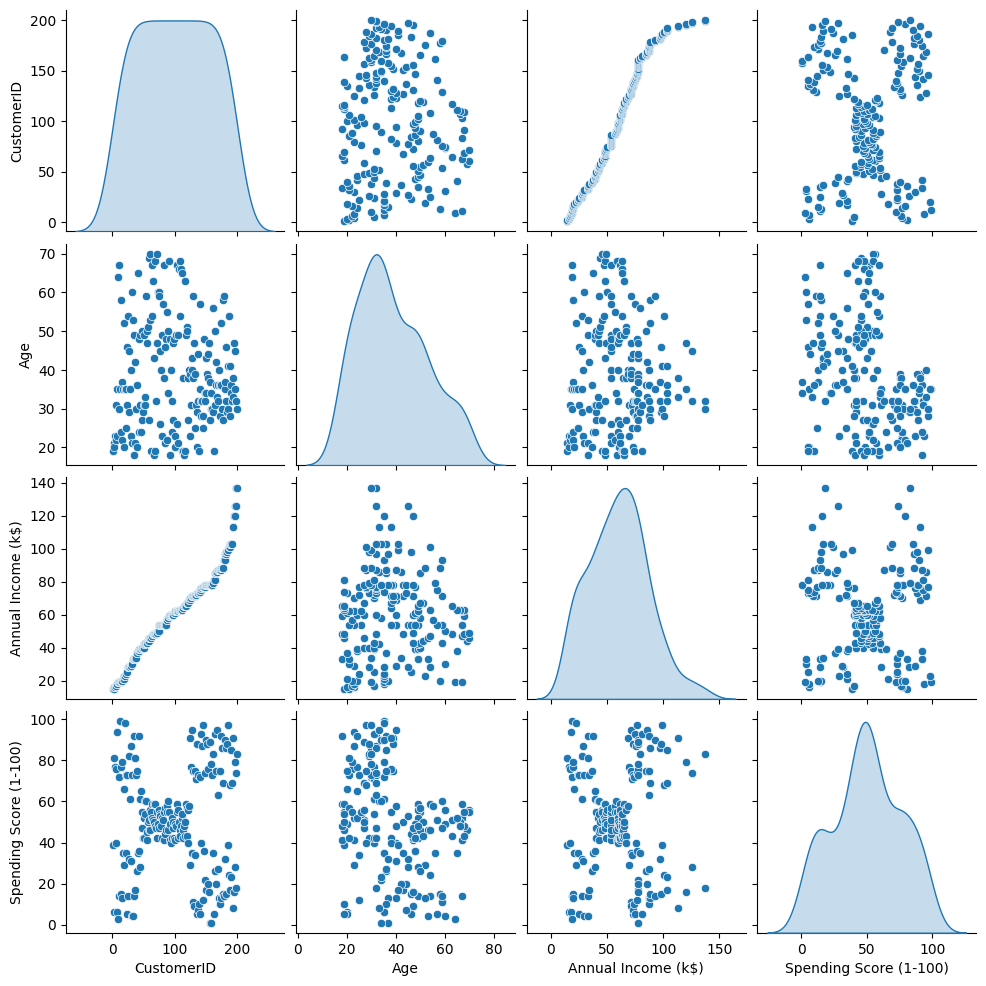

In [5]:
# Vizualizace distribuce dat
sns.pairplot(data, diag_kind='kde')
plt.show()

# Příprava dat
- ošetření NaN hodnot
- encodování textových sloupců

In [6]:
# Kontrola NaN hodnot
print("Missing values:\n", data.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Encoding textových hodnot
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


# Výběr proměnných
- zobrazení vztahů mezi proměnnými (pairplot)
- hledáme kombinaci proměnných, které lze opticky ropzdělit do skupin
- vytvoření X pouze s těmito sloupci

In [8]:
# Výběr proměnných
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
# Standardizace dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Zjištění parametru modelu k-mean
- vykreslení elbow grafu
- zjištění ideálního počtu clusterů

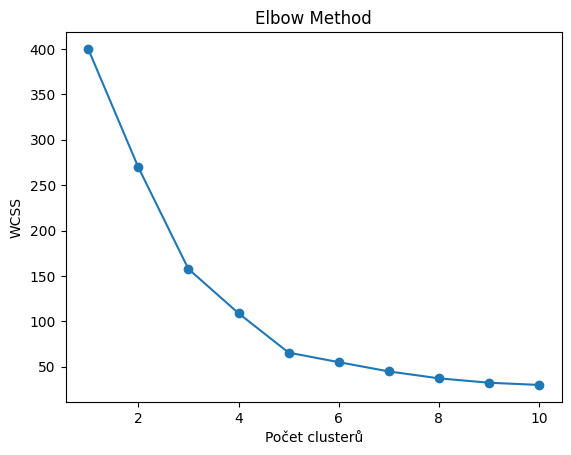

In [18]:
# Elbow metoda pro nalezení optimálního počtu clusterů
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Počet clusterů')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# k-mean model pro zjištěný počet clusterů
- natrénování modelu
- predikce dat

In [17]:
# Trénování K-means s optimálním počtem clusterů (např. 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Vizualizace modelu
- vykreslení obarvených skupin grafů

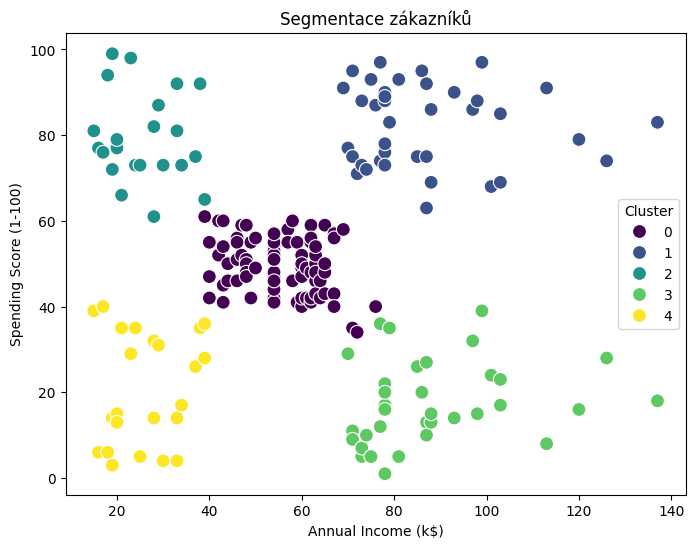

In [15]:
# Vizualizace clusterů
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], 
                hue=data['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Segmentace zákazníků')
plt.show()


## Výklad modelu
- Popište jednotlivé skupiny
- Na jaké zákazníky se zaměřit?

In [19]:
# Interpretace výsledků
group_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(group_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [14]:
# Výběr cílového segmentu (např. vysoký příjem a vysoké výdaje)
target_segment = group_summary[(group_summary['Annual Income (k$)'] > 70) & 
                               (group_summary['Spending Score (1-100)'] > 60)]
print("Cílový segment:\n", target_segment)

Cílový segment:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
1                 86.538462               82.128205
